In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [3]:
import warnings, os, json, math, sys
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from IPython.display import display

from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_recall_curve, roc_curve, auc,
    f1_score, precision_score, recall_score, confusion_matrix, brier_score_loss
)

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

from xgboost import XGBClassifier

warnings.filterwarnings('ignore')
sns.set_context("notebook")
plt.rcParams["figure.figsize"]=(10,5)

SEED = 42
np.random.seed(SEED)

# Business cost assumptions (tune as needed)
COST_FP = 5.0     # investigation cost per false alert
COST_FN = 200.0   # average loss per missed fraud

In [4]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


from matplotlib import pyplot as plt
_df_0['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['V1'].plot(kind='hist', bins=20, title='V1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['V2'].plot(kind='hist', bins=20, title='V2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['V3'].plot(kind='hist', bins=20, title='V3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Time', y='V1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='V1', y='V2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='V2', y='V3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='V3', y='V4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V4')

from matplotlib import pyplot as plt
_df_12['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['V1'].plot(kind='line', figsize=(8, 4), title='V1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['V2'].plot(kind='line', figsize=(8, 4), title='V2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['V3'].plot(kind='line', figsize=(8, 4), title='V3')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

In [7]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
print("Shape:", df.shape)

Shape: (284807, 31)


In [9]:
print(df.columns.tolist())

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [10]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)

Duplicates: 1081


In [12]:
df['Hours'] = (df['Time'] / 3600) % 24

In [13]:
df['Hours']

,Hours
0,0.000000
1,0.000000
2,0.000278
3,0.000278
4,0.000556
...,...
283721,23.996111
283722,23.996389
283723,23.996667
283724,23.996667


##Feature Engineering

In [14]:
# Time-derived proxies (Time = seconds-from-start, not real timestamps)

df['Hour_from_start_mod24'] = ((df['Time'] // 3600) % 24).astype(int)
df['is_night_proxy'] = df['Hour_from_start_mod24'].isin([22,23,0,1,2,3,4,5]).astype(int)
df['is_business_hours_proxy'] = df['Hour_from_start_mod24'].between(9,17).astype(int)

df['_log_amount'] = np.log1p(df['Amount'])


features = [c for c in df.columns if c.startswith("V")] + [
    'Amount','_log_amount',
    'Hour_from_start_mod24','is_night_proxy','is_business_hours_proxy'
]
target = "Class"

##Exploratary Data Analysis(EDA)

##Imbalance + Pie

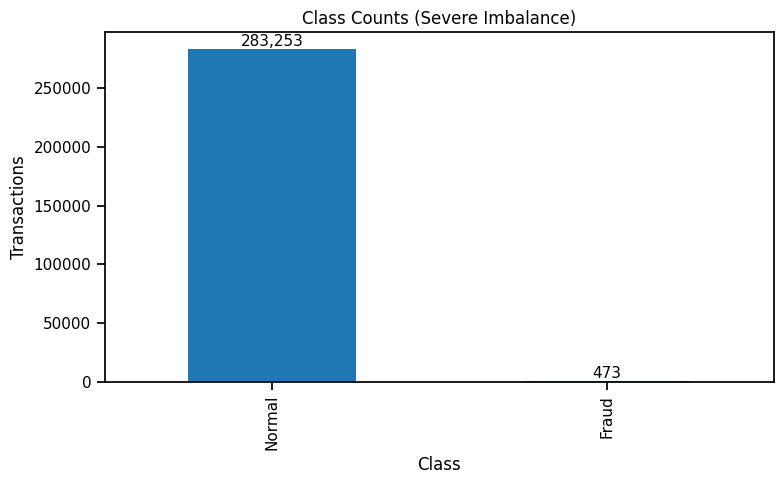

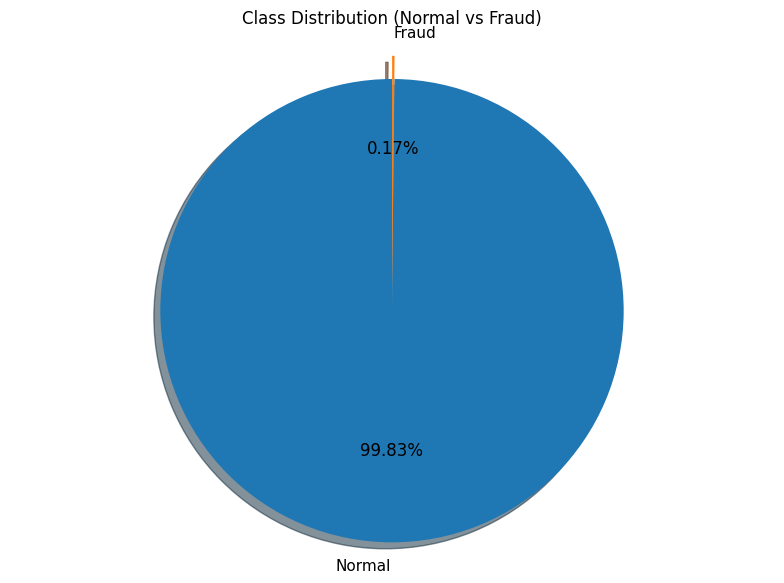

In [15]:
counts = df['Class'].value_counts().rename({0:'Normal', 1:'Fraud'})
fig, ax = plt.subplots(figsize=(8,5))
counts.plot(kind='bar', ax=ax)
for i, v in enumerate(counts.values):
    ax.text(i, v, f"{v:,}", ha='center', va='bottom', fontsize=11)
ax.set_title('Class Counts (Severe Imbalance)')
ax.set_ylabel('Transactions'); ax.set_xlabel('Class')
plt.tight_layout()
plt.show()

# pie chart
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(counts.values, labels=counts.index, autopct='%1.2f%%', startangle=90, explode=[0,0.1], shadow=True)
ax.set_title('Class Distribution (Normal vs Fraud)')
ax.axis('equal')
plt.tight_layout()
plt.show()

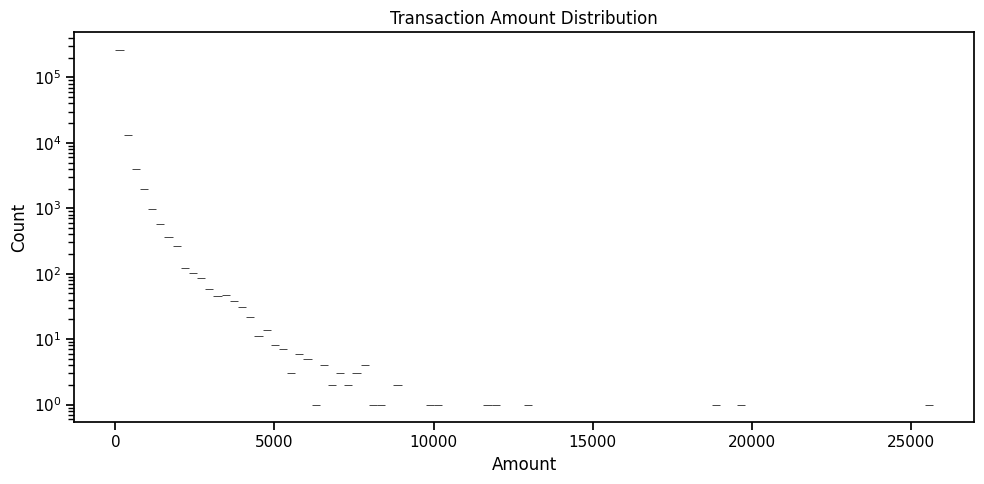

In [16]:
sns.histplot(df["Amount"], bins=100, log_scale=(False, True))
plt.title("Transaction Amount Distribution")
plt.tight_layout()
plt.show()

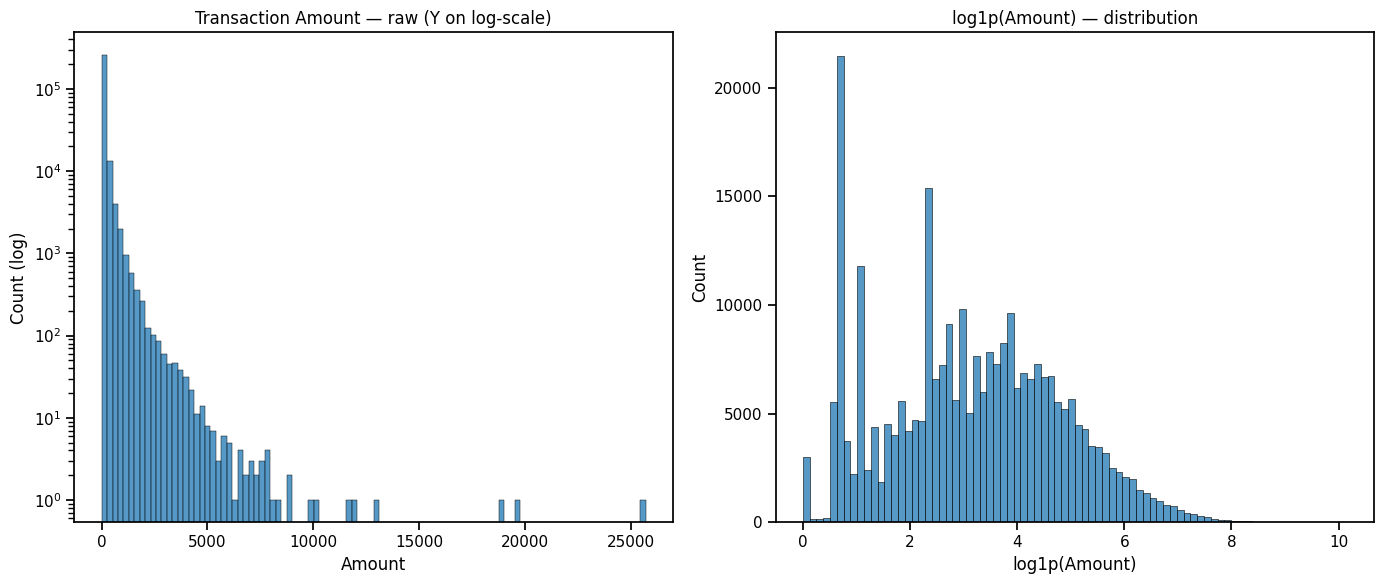

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Raw amount, log-scaled Y
sns.histplot(df["Amount"], bins=100, ax=axes[0])
axes[0].set_yscale("log")
axes[0].set_title("Transaction Amount — raw (Y on log-scale)")
axes[0].set_xlabel("Amount")
axes[0].set_ylabel("Count (log)")

# Log-transformed feature on X
sns.histplot(df["_log_amount"], bins=80, ax=axes[1])
axes[1].set_title("log1p(Amount) — distribution")
axes[1].set_xlabel("log1p(Amount)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

##Fraud Rate Per Hour

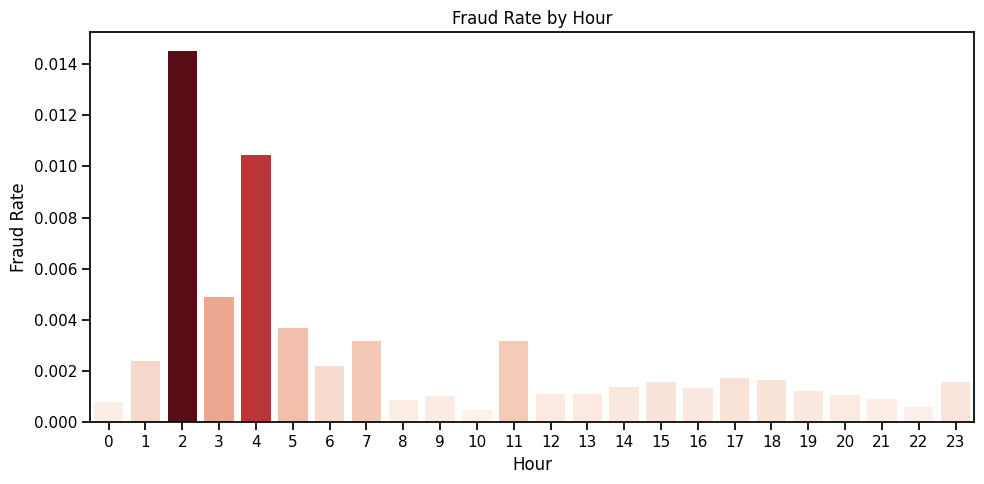

In [18]:
fraud_by_hour = df.groupby("Hour_from_start_mod24")["Class"].mean()

cmap = sns.color_palette("Reds", as_cmap=True)
vals = (fraud_by_hour / fraud_by_hour.max()).values
pal = [cmap(v) for v in vals]

sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values, palette=pal)
plt.title("Fraud Rate by Hour")
plt.xlabel("Hour")
plt.ylabel("Fraud Rate")
plt.tight_layout()
plt.show()

##Transactions Per Hour

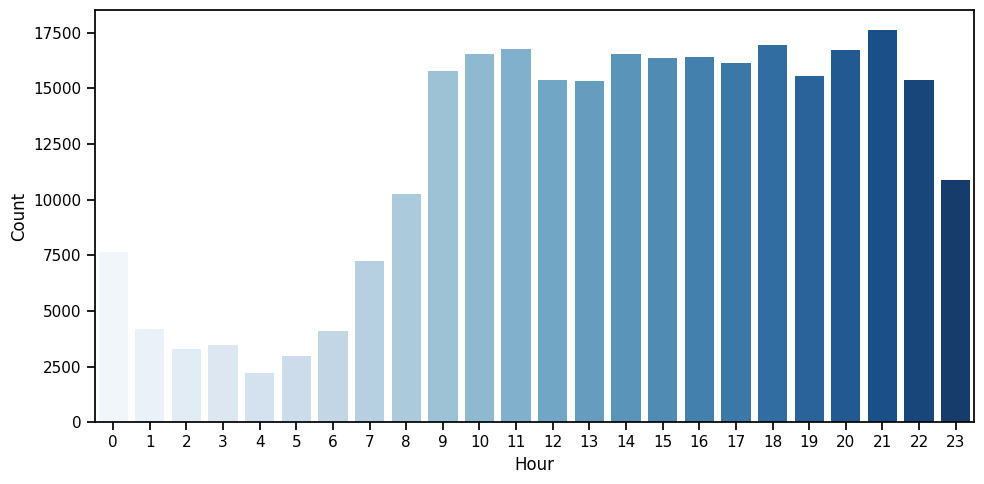

In [19]:
tx_by_hour = df.groupby("Hour_from_start_mod24")[target].count()
sns.barplot(x=tx_by_hour.index, y=tx_by_hour.values, palette='Blues')
plt.xlabel('Hour')
plt.ylabel("Count")
plt.tight_layout()
plt.show()

##Boxplot: Amount by Class

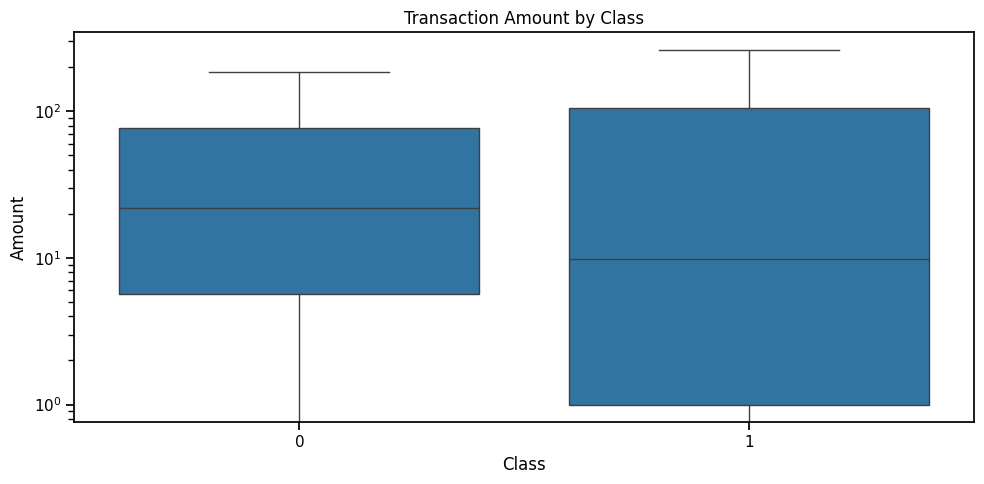

In [20]:
sns.boxplot(x= "Class", y="Amount" , data=df , showfliers=False)
plt.yscale("log")
plt.title("Transaction Amount by Class")
plt.tight_layout()
plt.show()

##Amount deciles vs fraud rate

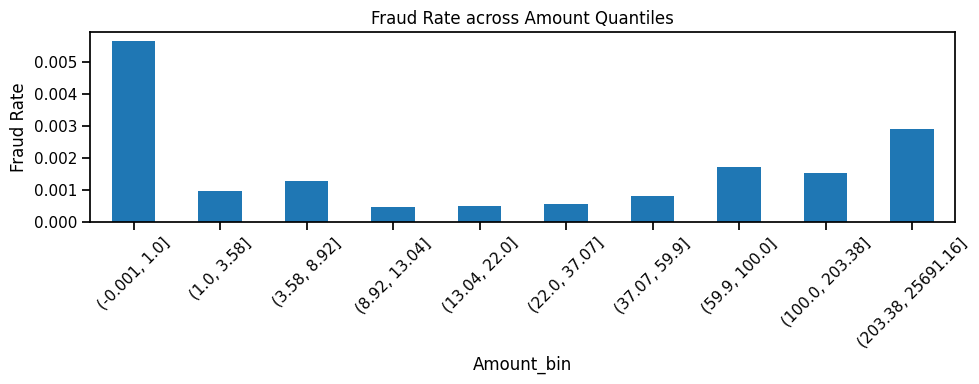

In [21]:
df["Amount_bin"] = pd.qcut(df["Amount"], q=10, duplicates="drop")
fraud_rate_bins = df.groupby("Amount_bin")["Class"].mean()
fraud_rate_bins.plot(kind="bar", figsize=(10,4))
plt.title("Fraud Rate across Amount Quantiles")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Correlation Matrix

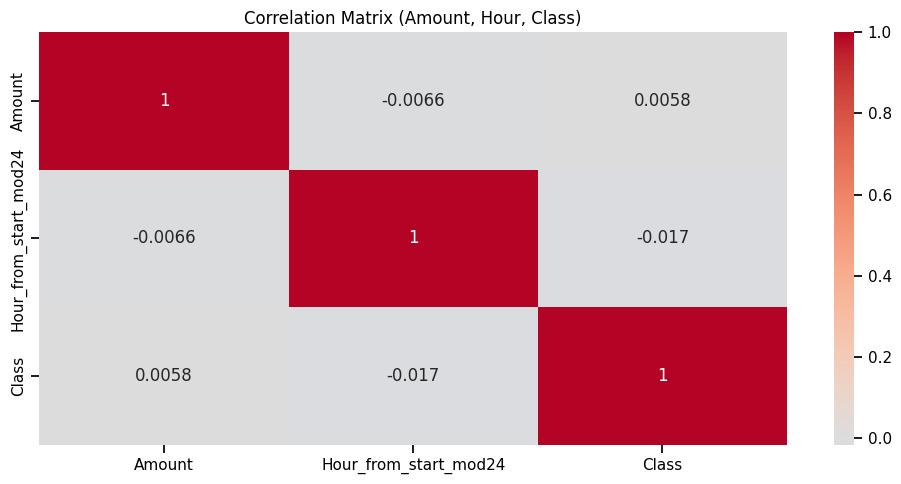

In [22]:
sns.heatmap(df[["Amount","Hour_from_start_mod24","Class"]].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Amount, Hour, Class)")
plt.tight_layout()
plt.show()

##Time Segments (Morning / Afternoon / Evening / Night)

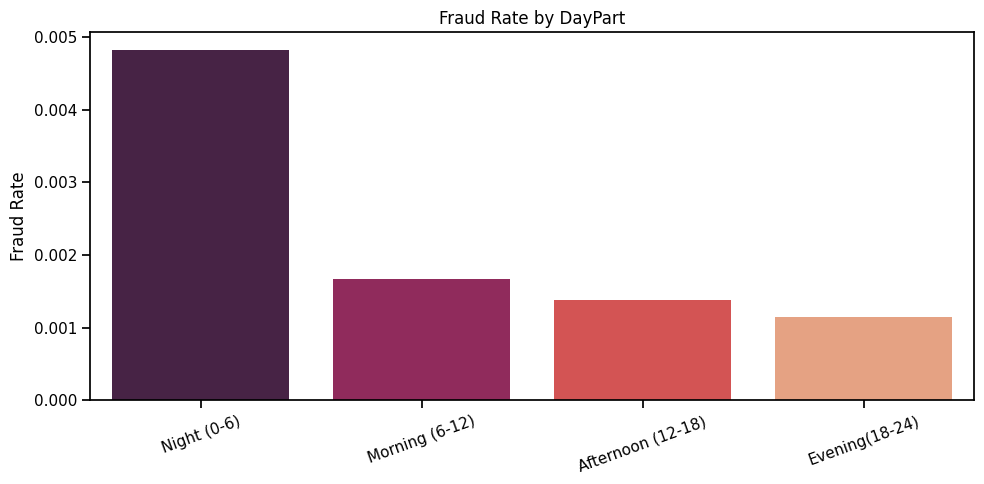

In [23]:
bins   = [0,6,12,18,24]
labels = ["Night (0-6)", "Morning (6-12)", "Afternoon (12-18)", "Evening(18-24)"]
df["DayPart"] = pd.cut(df["Hour_from_start_mod24"], bins=bins, labels=labels, right=False, include_lowest=True)


fraud_by_part  = df.groupby("DayPart")["Class"].mean().reindex(labels)

sns.barplot(x=fraud_by_part.index, y=fraud_by_part.values, palette="rocket")
plt.xticks(rotation=20)
plt.title("Fraud Rate by DayPart")
plt.xlabel("")
plt.ylabel("Fraud Rate")
plt.tight_layout()
plt.show()

##Heatmap for Hour Rate

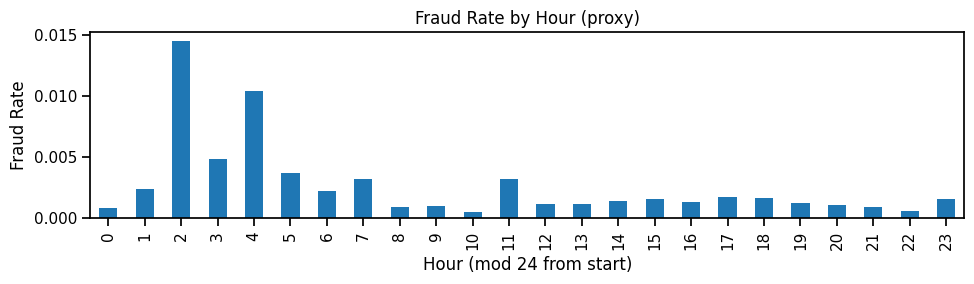

In [24]:
hour_rate = df.groupby("Hour_from_start_mod24")["Class"].mean().reindex(range(24)).fillna(0)
hour_rate.plot(kind="bar", figsize=(10,3), title="Fraud Rate by Hour (proxy)")
plt.xlabel("Hour (mod 24 from start)"); plt.ylabel("Fraud Rate")
plt.tight_layout(); plt.show()

##Barplot Fraud vs Normal

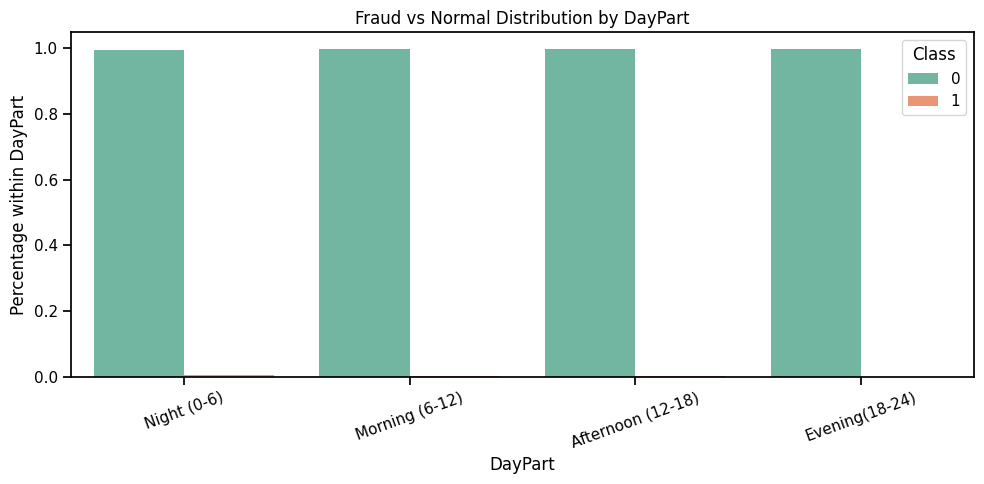

In [25]:
day_counts = df.groupby(["DayPart","Class"]).size().reset_index(name="Count")
day_total  = day_counts.groupby("DayPart")["Count"].transform("sum")
day_counts["Pct"] = day_counts["Count"] / day_total

sns.barplot(x="DayPart", y="Pct", hue="Class", data=day_counts, palette="Set2")
plt.title("Fraud vs Normal Distribution by DayPart")
plt.ylabel("Percentage within DayPart")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

##Cumulative share of fraud by Amount rank

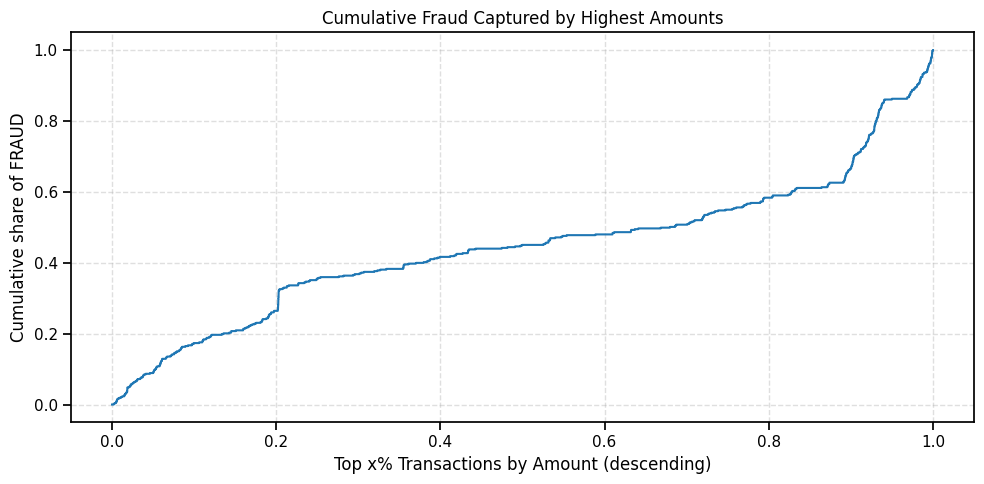

In [26]:
tmp = df[["Amount","Class"]].sort_values("Amount", ascending=False).reset_index(drop=True)
tmp["cum_tx"] = np.arange(1, len(tmp)+1) / len(tmp)
tmp["cum_fraud"] = tmp["Class"].cumsum() / tmp["Class"].sum()

plt.plot(tmp["cum_tx"], tmp["cum_fraud"])
plt.xlabel("Top x% Transactions by Amount (descending)")
plt.ylabel("Cumulative share of FRAUD")
plt.title("Cumulative Fraud Captured by Highest Amounts")
plt.grid(True, ls="--", alpha=0.4)
plt.tight_layout()
plt.show()

##Time-based Split (no look-ahead leakage)

In [27]:
df_sorted = df.sort_values("Time").reset_index(drop=True)
cut = int(0.8 * len(df_sorted))
train_df, test_df = df_sorted.iloc[:cut], df_sorted.iloc[cut:]

# Inner validation from train (time-ordered)
cut_in = int(0.8 * len(train_df))
train__df, val_df = train_df.iloc[:cut_in], train_df.iloc[cut_in:]

X_train , y_train = train__df[features], train__df[target].astype(int)
X_val   , y_val   = val_df[features]  , val_df[target].astype(int)
X_test  , y_test  = test_df[features] , test_df[target].astype(int)

print("Inner-Train:", len(X_train), "| Val:", len(X_val), "| Test:", len(X_test))
print("Train prevalence:", y_train.mean(), "| Test prevalence:", y_test.mean())

Inner-Train: 181584 | Val: 45396 | Test: 56746
Train prevalence: 0.001910961318177813 | Test prevalence: 0.0013040566735981391


##Utilities: Metrics, Thresholds, Cost

In [28]:
def evaluate_block(y_true, y_score, thr=0.5):
    y_pred = (y_score >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
    return dict(
        threshold=float(thr),
        precision=precision_score(y_true, y_pred, zero_division=0),
        recall=recall_score(y_true, y_pred),
        f1=f1_score(y_true, y_pred, zero_division=0),
        roc_auc=roc_auc_score(y_true, y_score),
        auprc=average_precision_score(y_true, y_score),
        brier=brier_score_loss(y_true, y_score),
        tp=int(tp), fp=int(fp), fn=int(fn), tn=int(tn)
    )

def thr_for_precision(y_true, y_score, target_p=0.90):
    ps, rs, ths = precision_recall_curve(y_true, y_score)
    hits = np.where(ps[:-1] >= target_p)[0]
    if hits.size:
        i = hits[0]
        return float(ths[i]), float(ps[i]), float(rs[i])
    i = np.argmax(0.5*ps[:-1] + 0.5*rs[:-1])
    return float(ths[i]), float(ps[i]), float(rs[i])


def thr_min_cost(y_true , y_score , cost_fp=COST_FP , cost_fn=COST_FN, grid=1001):
    best_thr , best_cost = 0.5, float("inf")
    for t in np.linspace(0,1, grid):
        yhat = (y_score >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true ,yhat, labels=[0,1]).ravel()
        cost = fp*cost_fp + fn*cost_fn
        if cost < best_cost:
            best_thr , best_cost = float(t), float(cost)
    return best_thr , best_cost

def realized_cost(y_true, y_score, thr, cost_fp=COST_FP, cost_fn=COST_FN):
    yhat = (y_score >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, yhat, labels=[0,1]).ravel()
    return fp*cost_fp + fn*cost_fn

def plot_pr_roc(y_true, y_score ,title):
    ps,rs , _ = precision_recall_curve(y_true , y_score)
    plt.plot(rs, ps)
    plt.axhline(y_true.mean(), ls="--", alpha=0.5)
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title(f"{title} — PR (AP={average_precision_score(y_true,y_score):.3f})")
    plt.grid(True, ls="--", alpha=0.4); plt.tight_layout(); plt.show()
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.plot(fpr, tpr)
    plt.xlabel("FPR"); plt.ylabel("TPR")
    plt.title(f"{title} — ROC (AUC={roc_auc_score(y_true,y_score):.3f})")
    plt.grid(True, ls="--", alpha=0.4); plt.tight_layout(); plt.show()

def reliability_plot(y_true, y_score, title, bins=10):
    prob_true, prob_pred = calibration_curve(y_true, y_score, n_bins=bins, strategy="quantile")
    plt.plot(prob_pred, prob_true, marker="o")
    plt.plot([0,1],[0,1], "--", alpha=0.6)
    plt.xlabel("Predicted probability"); plt.ylabel("Empirical probability")
    plt.title(title + f" — Brier={brier_score_loss(y_true, y_score):.4f}")
    plt.grid(True, ls="--", alpha=0.4); plt.tight_layout(); plt.show()

def expected_calibration_error(y_true, y_prob, n_bins=15):
    """
    Simple (non-standardized) ECE: weighted avg |acc - conf| over quantized bins.
    For formal comparisons, prefer standardized definitions.
    """
    bins = np.linspace(0.0, 1.0, n_bins+1)
    idx = np.digitize(y_prob, bins) - 1
    ece = 0.0
    for b in range(n_bins):
        mask = (idx == b)
        if not np.any(mask):
            continue
        conf = y_prob[mask].mean()
        acc  = y_true[mask].mean()
        ece += (mask.mean()) * abs(acc - conf)
    return float(ece)

rng = np.random.default_rng(SEED)
def bootstrap_ci(metric_fn, y_true, y_score, B=300, alpha=0.05):
    n = len(y_true)
    vals = []
    for _ in range(B):
        idx = rng.integers(0, n, size=n)
        vals.append(metric_fn(y_true[idx], y_score[idx]))
    lo = np.quantile(vals, alpha/2)
    hi = np.quantile(vals, 1 - alpha/2)
    return float(lo), float(hi)


def sweep_thresholds(y_true, y_prob, costs=(COST_FP, COST_FN)):
    ths = np.linspace(0, 1, 101)
    rows = []
    for t in ths:
        yhat = (y_prob >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, yhat, labels=[0,1]).ravel()
        prec = precision_score(y_true, yhat, zero_division=0)
        rec  = recall_score(y_true, yhat)
        f1   = f1_score(y_true, yhat, zero_division=0)
        cost = fp*costs[0] + fn*costs[1]
        rows.append([t, prec, rec, f1, tp, fp, fn, tn, cost])
    return pd.DataFrame(rows, columns=["thr","precision","recall","f1","tp","fp","fn","tn","cost"])

def plot_alerts_and_savings(df_sweep, title):
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    # Alerts = predicted positives = tp+fp
    ax[0].plot(df_sweep["thr"], df_sweep["tp"]+df_sweep["fp"])
    ax[0].set_title(title+" — Alerts vs Threshold"); ax[0].set_xlabel("Threshold"); ax[0].set_ylabel("#Alerts")
    # Savings = (tp * FN_cost) - (fp * FP_cost)
    savings = df_sweep["tp"]*COST_FN - df_sweep["fp"]*COST_FP
    ax[1].plot(df_sweep["thr"], savings)
    ax[1].set_title(title+" — Net Savings vs Threshold"); ax[1].set_xlabel("Threshold"); ax[1].set_ylabel("Net Savings ($)")
    plt.tight_layout(); plt.show()

##Strong Model

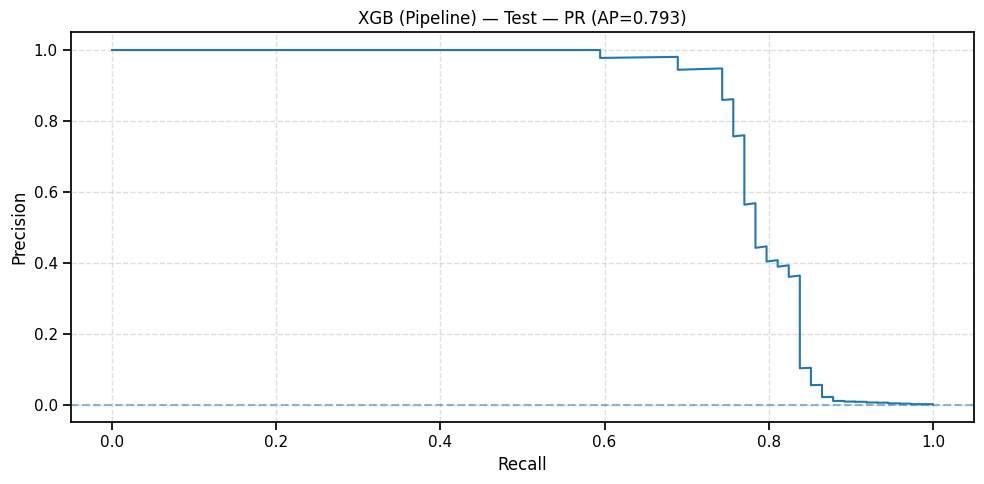

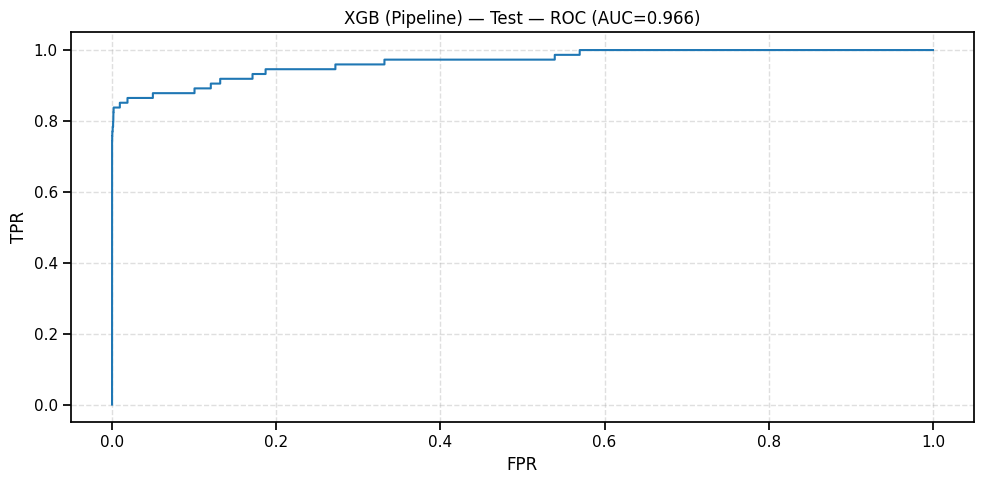

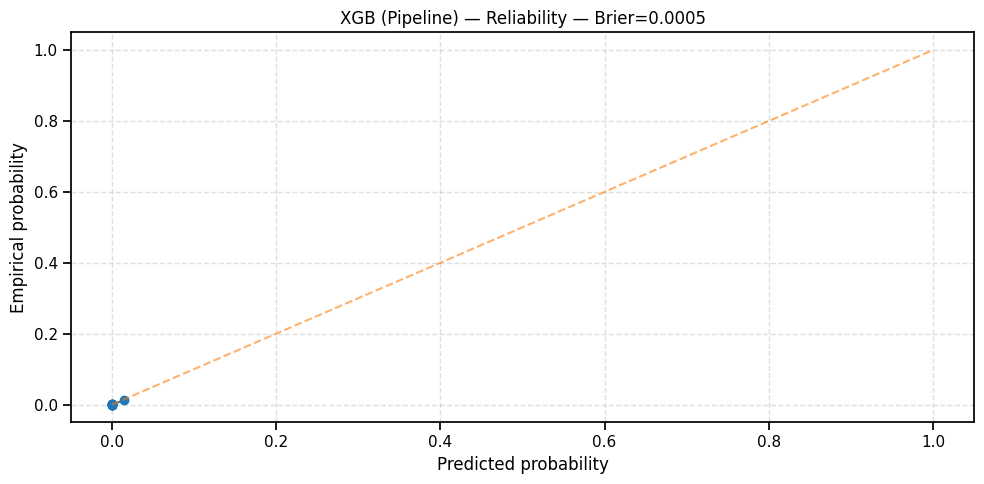

[XGB|Pipeline] VAL AUPRC: 0.7783485121414375
[XGB|Pipeline] TEST AUPRC: 0.793093267397623


In [30]:
pos, neg = int((y_train==1).sum()), int((y_train==0).sum())
spw = neg / max(1, pos)  # scale_pos_weight ≈ imbalance ratio

xgb_pipe = ImbPipeline(steps=[
    ("model", XGBClassifier(
        n_estimators=600, max_depth=4, learning_rate=0.05,
        subsample=0.9, colsample_bytree=0.9, reg_lambda=1.0,
        tree_method="hist", random_state=SEED,
        scale_pos_weight=spw, n_jobs=-1, eval_metric="aucpr"
    ))
])
xgb_pipe.fit(X_train, y_train)

val_xgb_proba  = xgb_pipe.predict_proba(X_val)[:, 1]
test_xgb_proba = xgb_pipe.predict_proba(X_test)[:, 1]

plot_pr_roc(y_test, test_xgb_proba, "XGB (Pipeline) — Test")
reliability_plot(y_test, test_xgb_proba, "XGB (Pipeline) — Reliability")
print("[XGB|Pipeline] VAL AUPRC:",  average_precision_score(y_val, val_xgb_proba))
print("[XGB|Pipeline] TEST AUPRC:", average_precision_score(y_test, test_xgb_proba))

##Calibration (Isotonic) with TimeSeriesSplit on TRAIN

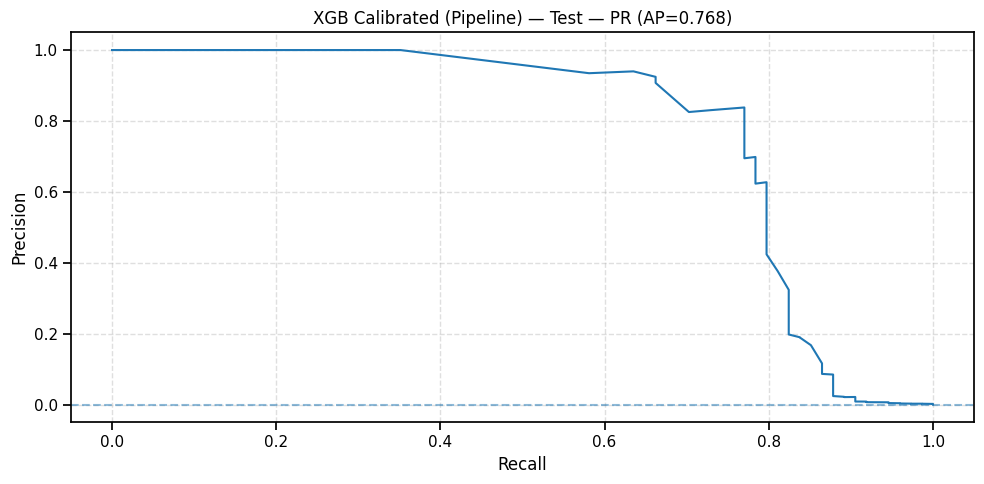

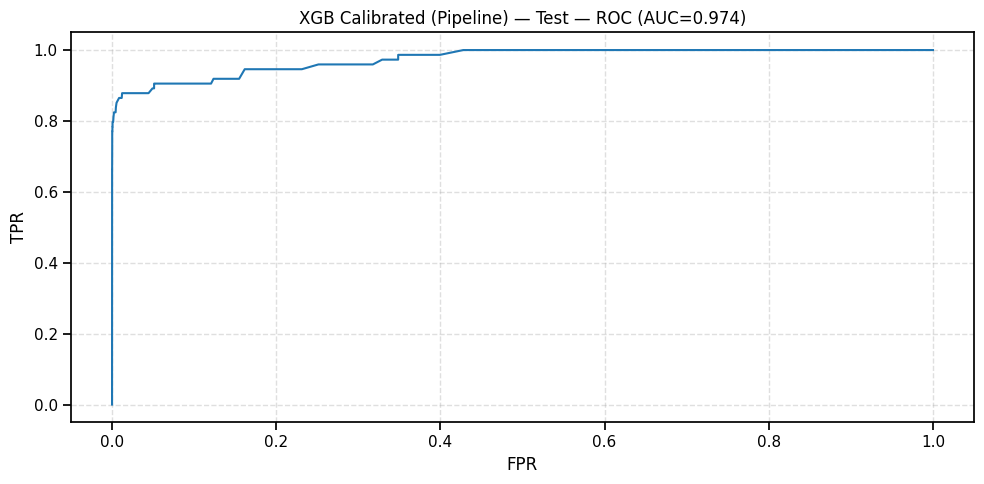

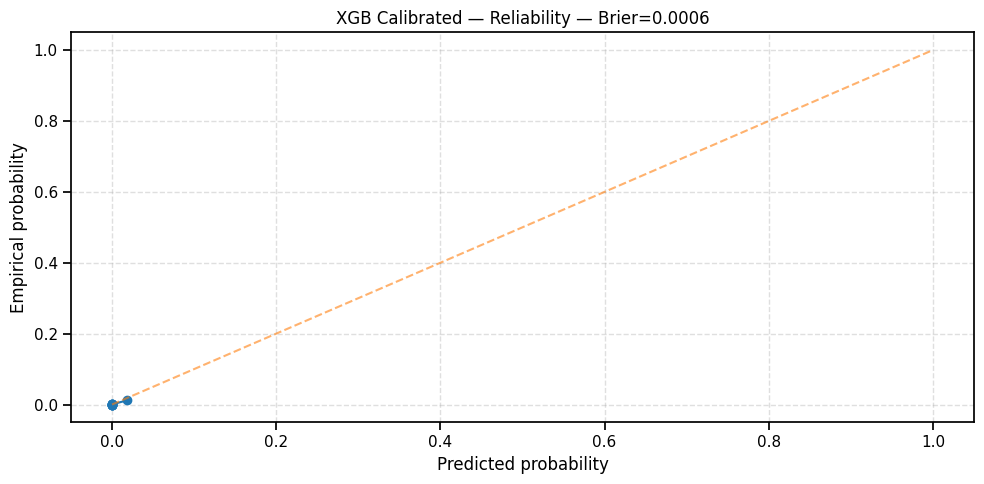

[XGB-Cal|Pipeline] VAL AUPRC: 0.7560300047963272
[XGB-Cal|Pipeline] TEST AUPRC: 0.7678097490517377
ECE[Test] XGB-Cal: 0.0007581389254489952


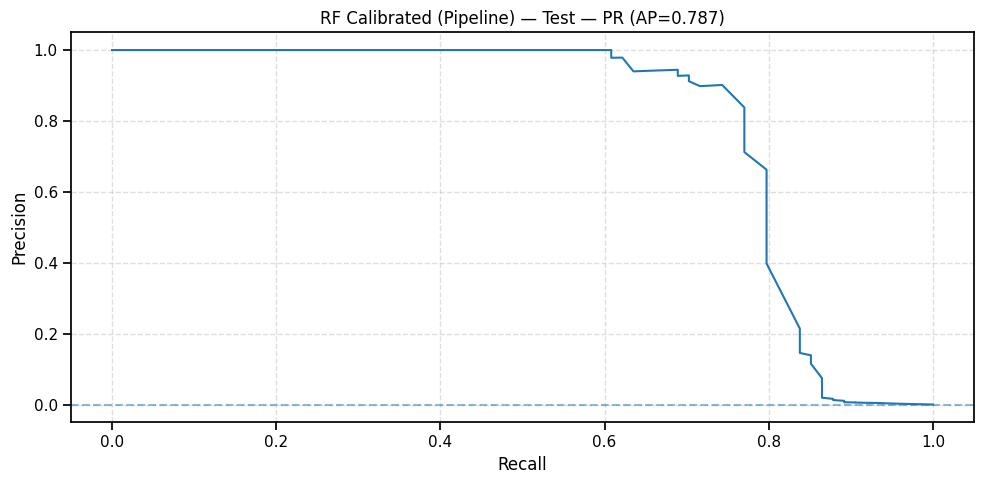

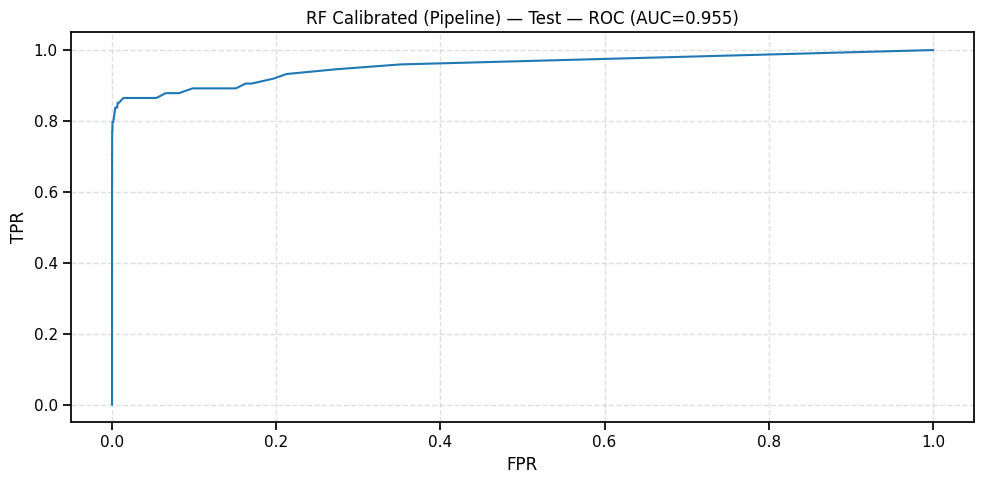

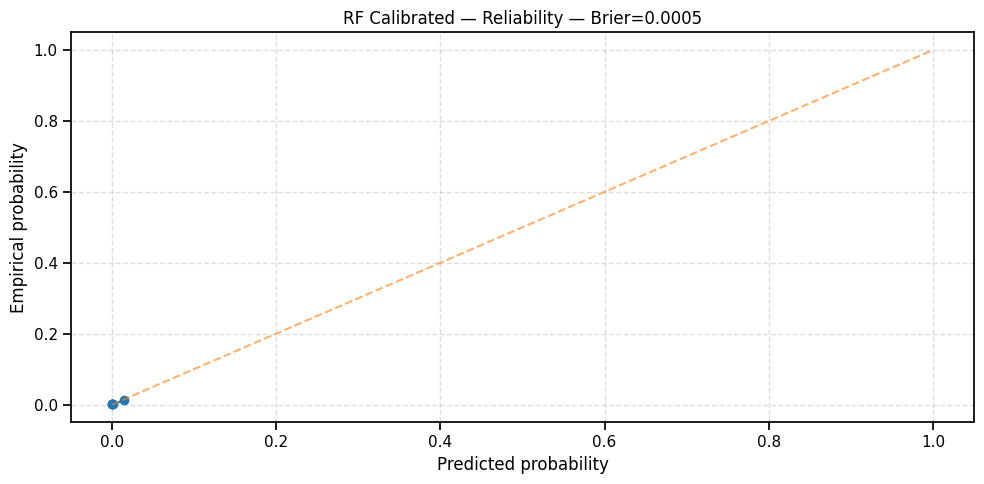

[RF-Cal] VAL AUPRC: 0.7429412238400823
[RF-Cal] TEST AUPRC: 0.7870914598203886
ECE[Test] RF-Cal : 0.00042467636259168733


In [31]:
cal_cv = TimeSeriesSplit(n_splits=3)

# Calibrated XGB
xgb_cal = CalibratedClassifierCV(estimator=xgb_pipe, method="isotonic", cv=cal_cv)
xgb_cal.fit(X_train, y_train)
val_xgb_cal  = xgb_cal.predict_proba(X_val)[:, 1]
test_xgb_cal = xgb_cal.predict_proba(X_test)[:, 1]

plot_pr_roc(y_test, test_xgb_cal, "XGB Calibrated (Pipeline) — Test")
reliability_plot(y_test, test_xgb_cal, "XGB Calibrated — Reliability")
print("[XGB-Cal|Pipeline] VAL AUPRC:",  average_precision_score(y_val, val_xgb_cal))
print("[XGB-Cal|Pipeline] TEST AUPRC:", average_precision_score(y_test, test_xgb_cal))
print("ECE[Test] XGB-Cal:", expected_calibration_error(y_test.values, test_xgb_cal, n_bins=15))


# Calibrated RF
rf_cal = CalibratedClassifierCV(estimator=rf_pipe, method="isotonic", cv=cal_cv)
rf_cal.fit(X_train, y_train)
val_rf_cal  = rf_cal.predict_proba(X_val)[:, 1]
test_rf_cal = rf_cal.predict_proba(X_test)[:, 1]

plot_pr_roc(y_test, test_rf_cal, "RF Calibrated (Pipeline) — Test")
reliability_plot(y_test, test_rf_cal, "RF Calibrated — Reliability")
print("[RF-Cal] VAL AUPRC:",  average_precision_score(y_val,  val_rf_cal))
print("[RF-Cal] TEST AUPRC:", average_precision_score(y_test, test_rf_cal))
print("ECE[Test] RF-Cal :", expected_calibration_error(y_test.values, test_rf_cal,  n_bins=15))

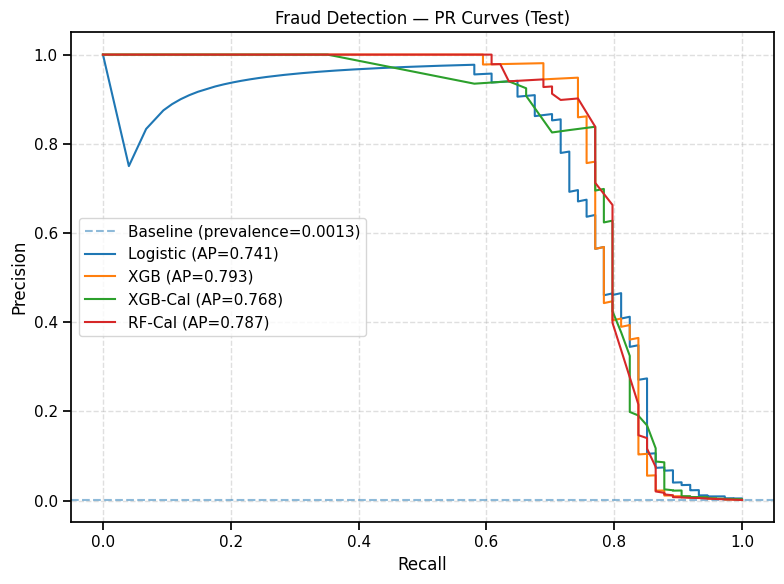

In [33]:
def plot_pr_overlay(y_true, preds_dict, title="PR Curves — Overlay"):
    plt.figure(figsize=(8,6))
    base = y_true.mean()
    plt.axhline(base, ls="--", alpha=0.5, label=f"Baseline (prevalence={base:.4f})")

    for name, y_prob in preds_dict.items():
        ps, rs, _ = precision_recall_curve(y_true, y_prob)
        ap = average_precision_score(y_true, y_prob)
        plt.plot(rs, ps, label=f"{name} (AP={ap:.3f})")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)
    plt.grid(True, ls="--", alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()

preds_test = {
    "Logistic":        test_log_proba,
    "XGB":             test_xgb_proba,
    "XGB-Cal":         test_xgb_cal,
        "RF-Cal":          test_rf_cal,
}
plot_pr_overlay(y_test, preds_test, title="Fraud Detection — PR Curves (Test)")

##Reliability Overlay for key models

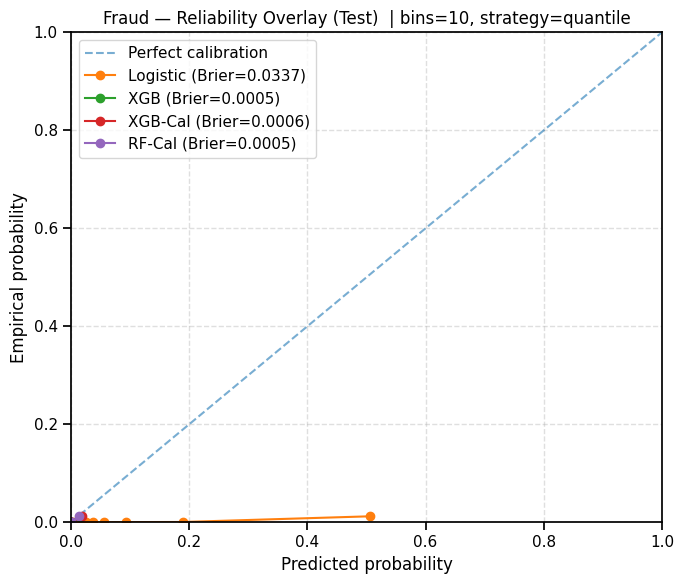

In [35]:
def reliability_overlay(y_true, preds_dict, bins=10, strategy="quantile",
                        title="Reliability (Calibration) — Overlay"):
    plt.figure(figsize=(7,6))
    plt.plot([0,1],[0,1], "--", alpha=0.6, label="Perfect calibration")

    for name, y_prob in preds_dict.items():
        prob_true, prob_pred = calibration_curve(y_true, y_prob,
                                                n_bins=bins, strategy=strategy)
        brier = brier_score_loss(y_true, y_prob)
        plt.plot(prob_pred, prob_true, marker="o", label=f"{name} (Brier={brier:.4f})")

    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel("Predicted probability")
    plt.ylabel("Empirical probability")
    plt.title(title + f"  | bins={bins}, strategy={strategy}")
    plt.grid(True, ls="--", alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()

reliab_models = {
    "Logistic": test_log_proba,
    "XGB":      test_xgb_proba,
    "XGB-Cal":  test_xgb_cal,
    "RF-Cal":   test_rf_cal,
}
reliability_overlay(y_test, reliab_models, bins=10, strategy="quantile",
                    title="Fraud — Reliability Overlay (Test)")

##Threshold Tuning XGB-Cal

[VAL|XGB-Cal] Thr@P≥90%: thr=0.803, P=0.900, R=0.692
[VAL|XGB-Cal] Thr@Min-Cost: thr=0.288, Cost=2235.00

===== XGB-Cal — TEST EVAL =====
XGB-Cal@Test (Thr@P≥90%): {'threshold': 0.8034449021021525, 'precision': 0.9074074074074074, 'recall': 0.6621621621621622, 'f1': 0.765625, 'roc_auc': np.float64(0.9743409682268378), 'auprc': np.float64(0.7678097490517377), 'brier': np.float64(0.0006017138942028084), 'tp': 49, 'fp': 5, 'fn': 25, 'tn': 56667}
XGB-Cal@Test (Thr@Min-Cost): {'threshold': 0.28800000000000003, 'precision': 0.5175438596491229, 'recall': 0.7972972972972973, 'f1': 0.6276595744680851, 'roc_auc': np.float64(0.9743409682268378), 'auprc': np.float64(0.7678097490517377), 'brier': np.float64(0.0006017138942028084), 'tp': 59, 'fp': 55, 'fn': 15, 'tn': 56617}
[TEST|XGB-Cal] Realized Cost @ P≥90% thr (0.803): 5025.00
[TEST|XGB-Cal] Realized Cost @ Min-Cost thr (0.288): 3275.00


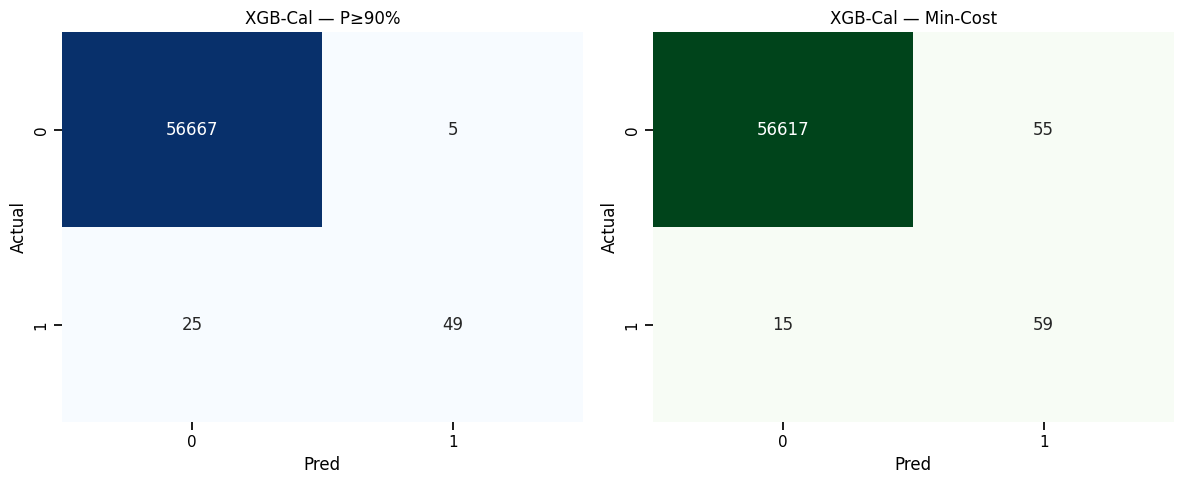

In [36]:
thr_p90_xgb, p_val_xgb, r_val_xgb = thr_for_precision(y_val, val_xgb_cal, target_p=0.90)
thr_cost_xgb, best_cost_val_xgb = thr_min_cost(y_val,  val_xgb_cal, cost_fp=COST_FP, cost_fn=COST_FN)

print(f"[VAL|XGB-Cal] Thr@P≥90%: thr={thr_p90_xgb:.3f}, P={p_val_xgb:.3f}, R={r_val_xgb:.3f}")
print(f"[VAL|XGB-Cal] Thr@Min-Cost: thr={thr_cost_xgb:.3f}, Cost={best_cost_val_xgb:.2f}")

eval_xgb_p90  = evaluate_block(y_test, test_xgb_cal, thr_p90_xgb)
eval_xgb_cost = evaluate_block(y_test, test_xgb_cal, thr_cost_xgb)
cm_xgb_p90  = confusion_matrix(y_test, (test_xgb_cal >= thr_p90_xgb ).astype(int))
cm_xgb_cost = confusion_matrix(y_test, (test_xgb_cal >= thr_cost_xgb).astype(int))

print("\n===== XGB-Cal — TEST EVAL =====")
print("XGB-Cal@Test (Thr@P≥90%):",  eval_xgb_p90)
print("XGB-Cal@Test (Thr@Min-Cost):", eval_xgb_cost)

cost_xgb_p90 = realized_cost(y_test, test_xgb_cal, thr_p90_xgb,  cost_fp=COST_FP, cost_fn=COST_FN)
cost_xgb_min = realized_cost(y_test, test_xgb_cal, thr_cost_xgb, cost_fp=COST_FP, cost_fn=COST_FN)
print(f"[TEST|XGB-Cal] Realized Cost @ P≥90% thr ({thr_p90_xgb:.3f}): {cost_xgb_p90:.2f}")
print(f"[TEST|XGB-Cal] Realized Cost @ Min-Cost thr ({thr_cost_xgb:.3f}): {cost_xgb_min:.2f}")

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(cm_xgb_p90,  annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('XGB-Cal — P≥90%');  axes[0].set_xlabel('Pred'); axes[0].set_ylabel('Actual')
sns.heatmap(cm_xgb_cost, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1])
axes[1].set_title('XGB-Cal — Min-Cost'); axes[1].set_xlabel('Pred'); axes[1].set_ylabel('Actual')
plt.tight_layout(); plt.show()

##Threshold tuning RF-Cal


[VAL|RF-Cal] Thr@P≥90%: thr=0.712, P=0.902, R=0.712
[VAL|RF-Cal] Thr@Min-Cost: thr=0.051, Cost=2260.00

===== RF-Cal — TEST EVAL =====
RF-Cal@Test (Thr@P≥90%): {'threshold': 0.712121212121212, 'precision': 0.8983050847457628, 'recall': 0.7162162162162162, 'f1': 0.7969924812030075, 'roc_auc': np.float64(0.955351062348345), 'auprc': np.float64(0.7870914598203886), 'brier': np.float64(0.00045009662595362984), 'tp': 53, 'fp': 6, 'fn': 21, 'tn': 56666}
RF-Cal@Test (Thr@Min-Cost): {'threshold': 0.051000000000000004, 'precision': 0.4645669291338583, 'recall': 0.7972972972972973, 'f1': 0.5870646766169154, 'roc_auc': np.float64(0.955351062348345), 'auprc': np.float64(0.7870914598203886), 'brier': np.float64(0.00045009662595362984), 'tp': 59, 'fp': 68, 'fn': 15, 'tn': 56604}
[TEST|RF-Cal] Realized Cost @ P≥90% thr (0.712): 4230.00
[TEST|RF-Cal] Realized Cost @ Min-Cost thr (0.051): 3340.00


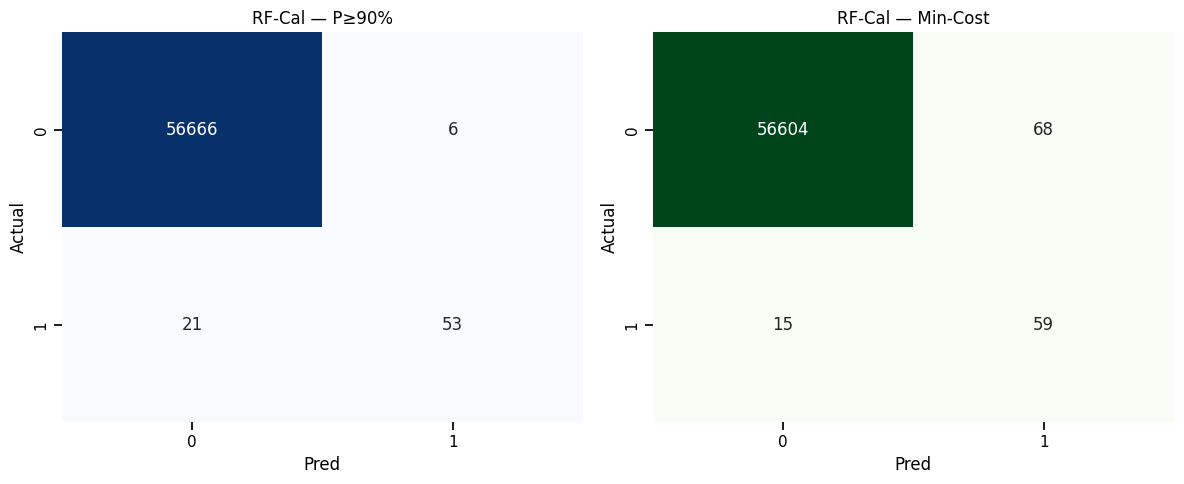

In [37]:
thr_p90_rf, p_val_rf, r_val_rf = thr_for_precision(y_val, val_rf_cal, target_p=0.90)
thr_cost_rf, best_cost_val_rf = thr_min_cost(y_val,  val_rf_cal, cost_fp=COST_FP, cost_fn=COST_FN)

print(f"\n[VAL|RF-Cal] Thr@P≥90%: thr={thr_p90_rf:.3f}, P={p_val_rf:.3f}, R={r_val_rf:.3f}")
print(f"[VAL|RF-Cal] Thr@Min-Cost: thr={thr_cost_rf:.3f}, Cost={best_cost_val_rf:.2f}")

eval_rf_p90  = evaluate_block(y_test, test_rf_cal, thr_p90_rf)
eval_rf_cost = evaluate_block(y_test, test_rf_cal, thr_cost_rf)
cm_rf_p90  = confusion_matrix(y_test, (test_rf_cal >= thr_p90_rf ).astype(int))
cm_rf_cost = confusion_matrix(y_test, (test_rf_cal >= thr_cost_rf).astype(int))

print("\n===== RF-Cal — TEST EVAL =====")
print("RF-Cal@Test (Thr@P≥90%):",  eval_rf_p90)
print("RF-Cal@Test (Thr@Min-Cost):", eval_rf_cost)

cost_rf_p90 = realized_cost(y_test, test_rf_cal, thr_p90_rf,  cost_fp=COST_FP, cost_fn=COST_FN)
cost_rf_min = realized_cost(y_test, test_rf_cal, thr_cost_rf, cost_fp=COST_FP, cost_fn=COST_FN)
print(f"[TEST|RF-Cal] Realized Cost @ P≥90% thr ({thr_p90_rf:.3f}): {cost_rf_p90:.2f}")
print(f"[TEST|RF-Cal] Realized Cost @ Min-Cost thr ({thr_cost_rf:.3f}): {cost_rf_min:.2f}")

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(cm_rf_p90,  annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('RF-Cal — P≥90%');  axes[0].set_xlabel('Pred'); axes[0].set_ylabel('Actual')
sns.heatmap(cm_rf_cost, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1])
axes[1].set_title('RF-Cal — Min-Cost'); axes[1].set_xlabel('Pred'); axes[1].set_ylabel('Actual')
plt.tight_layout(); plt.show()

##Cost & Alerts vs Threshold

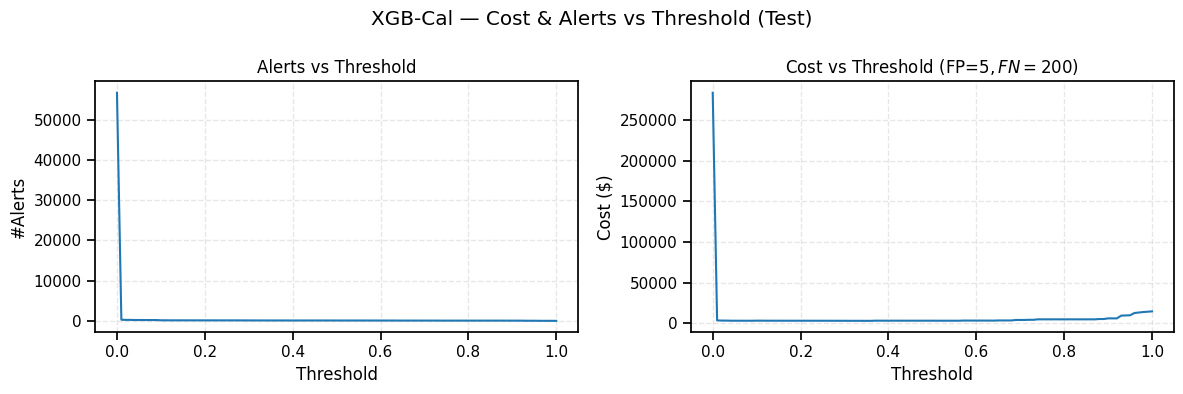

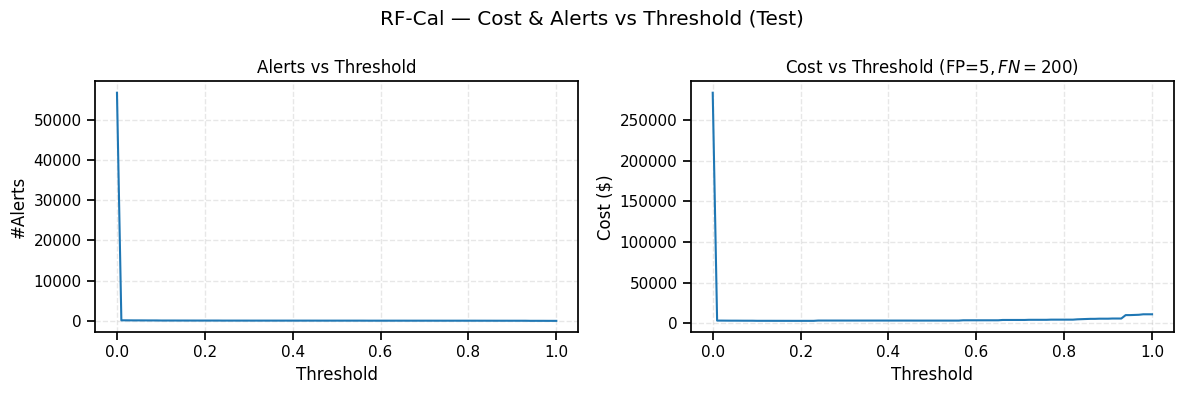

In [38]:
def plot_cost_and_alerts(y_true, y_prob, cost_fp=5.0, cost_fn=200.0, title="Cost & Alerts vs Threshold"):
    df_sweep = sweep_thresholds(y_true, y_prob, costs=(cost_fp, cost_fn))
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    # Alerts = tp + fp
    ax[0].plot(df_sweep["thr"], df_sweep["tp"] + df_sweep["fp"])
    ax[0].set_title("Alerts vs Threshold")
    ax[0].set_xlabel("Threshold"); ax[0].set_ylabel("#Alerts")
    ax[0].grid(True, ls="--", alpha=0.3)

    # Cost curve
    ax[1].plot(df_sweep["thr"], df_sweep["cost"])
    ax[1].set_title(f"Cost vs Threshold (FP=${cost_fp:.0f}, FN=${cost_fn:.0f})")
    ax[1].set_xlabel("Threshold"); ax[1].set_ylabel("Cost ($)")
    ax[1].grid(True, ls="--", alpha=0.3)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    return df_sweep

df_xgbcal_sweep = plot_cost_and_alerts(y_test, test_xgb_cal, cost_fp=COST_FP, cost_fn=COST_FN,
                                      title="XGB-Cal — Cost & Alerts vs Threshold (Test)")
df_rfcal_sweep  = plot_cost_and_alerts(y_test, test_rf_cal,  cost_fp=COST_FP, cost_fn=COST_FN,
                                      title="RF-Cal — Cost & Alerts vs Threshold (Test)")

##Calibrated Models — Side-by-Side

In [39]:
def summarise_model(name, y_true, y_prob, thr_p90, thr_cost):
    ap = average_precision_score(y_true, y_prob)
    roc = roc_auc_score(y_true, y_prob)
    brier = brier_score_loss(y_true, y_prob)
    ece = expected_calibration_error(y_true.values, y_prob, n_bins=15)
    cost_p90 = realized_cost(y_true, y_prob, thr_p90, COST_FP, COST_FN)
    cost_min = realized_cost(y_true, y_prob, thr_cost, COST_FP, COST_FN)
    ap_lo, ap_hi = bootstrap_ci(average_precision_score, y_true.values, y_prob)
    return {
        "Model": name, "AP(Test)": ap, "AP 95% CI": f"[{ap_lo:.3f}, {ap_hi:.3f}]",
        "ROC-AUC(Test)": roc, "Brier(Test)": brier, "ECE(15)": ece,
        "Thr@P90(val)": float(thr_p90), "Thr@MinCost(val)": float(thr_cost),
        "Cost@Test@P90": cost_p90, "Cost@Test@MinCost": cost_min,
    }

summary_df = pd.DataFrame([
    summarise_model("RF-Cal",  y_test, test_rf_cal,  thr_p90_rf,  thr_cost_rf),
    summarise_model("XGB-Cal", y_test, test_xgb_cal, thr_p90_xgb, thr_cost_xgb),
]).sort_values("AP(Test)", ascending=False)

display(summary_df.round(4))

,Model,AP(Test),AP 95% CI,ROC-AUC(Test),Brier(Test),ECE(15),Thr@P90(val),Thr@MinCost(val),Cost@Test@P90,Cost@Test@MinCost
0,RF-Cal,0.7871,"[0.692, 0.875]",0.9554,0.0005,0.0004,0.7121,0.051,4230.0,3340.0
1,XGB-Cal,0.7678,"[0.680, 0.856]",0.9743,0.0006,0.0008,0.8034,0.288,5025.0,3275.0


##Alerts and Fraud caught per 100k

In [40]:
def summarize_ops(y_true, y_prob, thr, name, cost_fp=COST_FP, cost_fn=COST_FN):
    yhat = (y_prob >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, yhat, labels=[0,1]).ravel()
    N = len(y_true)
    alerts = tp + fp
    cost = fp*cost_fp + fn*cost_fn
    savings = tp*cost_fn - fp*cost_fp

    return {
        "Model": name,
        "Threshold": float(thr),
        "TP": int(tp), "FP": int(fp), "FN": int(fn), "TN": int(tn),
        "Precision": precision_score(y_true, yhat, zero_division=0),
        "Recall": recall_score(y_true, yhat),
        "F1": f1_score(y_true, yhat, zero_division=0),
        "Alerts": int(alerts),
        "Alerts/100k":  (alerts / N) * 100000,
        "FraudCaught/100k": (tp / N) * 100000,
        "Cost($)": cost,
        "Cost/100k($)": (cost / N) * 100000,
        "NetSavings($)": savings
    }

ops_rows = []
ops_rows.append(summarize_ops(y_test, test_rf_cal,  thr_p90_rf,  "RF-Cal @P90"))
ops_rows.append(summarize_ops(y_test, test_rf_cal,  thr_cost_rf, "RF-Cal @MinCost"))
ops_rows.append(summarize_ops(y_test, test_xgb_cal, thr_p90_xgb, "XGB-Cal @P90"))
ops_rows.append(summarize_ops(y_test, test_xgb_cal, thr_cost_xgb,"XGB-Cal @MinCost"))
ops_df = pd.DataFrame(ops_rows)

prevalence = y_test.mean()
ops_df["Alerts%"] = (ops_df["Alerts/100k"] / 100000) * 100
ops_df["PrecisionLift(x)"] = ops_df["Precision"] / max(1e-9, prevalence)

cols_order = [
    "Model","Threshold",
    "TP","FP","FN","TN",
    "Precision","Recall","F1",
    "Alerts","Alerts%","Alerts/100k","FraudCaught/100k",
    "Cost($)","Cost/100k($)","NetSavings($)","PrecisionLift(x)"
]
ops_df = ops_df[cols_order].round(4)
display(ops_df)

cx_cost_rf  = realized_cost(y_test, test_rf_cal,  thr_p90_rf,  COST_FP, COST_FN)
cx_cost_xgb = realized_cost(y_test, test_xgb_cal, thr_p90_xgb, COST_FP, COST_FN)
cx_brier_rf, cx_brier_xgb = brier_score_loss(y_test, test_rf_cal), brier_score_loss(y_test, test_xgb_cal)

cx_best_by_cost  = "RF-Cal"  if cx_cost_rf  <= cx_cost_xgb  else "XGB-Cal"
cx_best_by_brier = "RF-Cal"  if cx_brier_rf <= cx_brier_xgb else "XGB-Cal"

print(f"[CX-first @P90] Lower Cost: {cx_best_by_cost}  | Better Brier: {cx_best_by_brier}")

min_cost_rf  = realized_cost(y_test, test_rf_cal,  thr_cost_rf,  COST_FP, COST_FN)
min_cost_xgb = realized_cost(y_test, test_xgb_cal, thr_cost_xgb, COST_FP, COST_FN)
best_cost_model = "RF-Cal" if min_cost_rf <= min_cost_xgb else "XGB-Cal"
print(f"[Cost-first @MinCost] Lower Cost: {best_cost_model}")

print(f"Prevalence(Test) = {prevalence:.4%} | Baseline Precision = {prevalence:.4%}")

,Model,Threshold,TP,FP,FN,TN,Precision,Recall,F1,Alerts,Alerts%,Alerts/100k,FraudCaught/100k,Cost($),Cost/100k($),NetSavings($),PrecisionLift(x)
0,RF-Cal @P90,0.7121,53,6,21,56666,0.8983,0.7162,0.7970,59,0.1040,103.9721,93.3987,4230.0,7454.2699,10570.0,688.8543
1,RF-Cal @MinCost,0.0510,59,68,15,56604,0.4646,0.7973,0.5871,127,0.2238,223.8043,103.9721,3340.0,5885.8774,11460.0,356.2475
2,XGB-Cal @P90,0.8034,49,5,25,56667,0.9074,0.6622,0.7656,54,0.0952,95.1609,86.3497,5025.0,8855.2497,9775.0,695.8343
3,XGB-Cal @MinCost,0.2880,59,55,15,56617,0.5175,0.7973,0.6277,114,0.2009,200.8952,103.9721,3275.0,5771.3319,11525.0,396.8722


[CX-first @P90] Lower Cost: RF-Cal  | Better Brier: RF-Cal
[Cost-first @MinCost] Lower Cost: XGB-Cal
Prevalence(Test) = 0.1304% | Baseline Precision = 0.1304%


##Sampling comparison

In [41]:
samplers = {
    "None": None,
    "Under": RandomUnderSampler(random_state=SEED),
    "SMOTE": SMOTE(random_state=SEED),
    "SMOTE+Tomek": SMOTETomek(random_state=SEED),
}

sample_results = []

for name, sampler in samplers.items():
    steps = []
    if sampler is not None:
        steps.append(("sampler", sampler))
    steps.extend([
        ("scaler", StandardScaler(with_mean=True)),
        ("clf", LogisticRegression(max_iter=2000, class_weight=None, random_state=SEED))
    ])

    pipe = ImbPipeline(steps=steps)
    pipe.fit(X_train, y_train)

    val_prob  = pipe.predict_proba(X_val)[:, 1]
    test_prob = pipe.predict_proba(X_test)[:, 1]

    thr90, _, _ = thr_for_precision(y_val, val_prob, 0.90)

    sample_results.append({
        "sampler": name,
        "VAL_AUPRC":  average_precision_score(y_val,  val_prob),
        "TEST_AUPRC": average_precision_score(y_test, test_prob),
        "TEST_ROC_AUC": roc_auc_score(y_test, test_prob),
        "TEST_Recall@P90": evaluate_block(y_test, test_prob, thr90)["recall"],
    })

sample_df = pd.DataFrame(sample_results).sort_values("TEST_AUPRC", ascending=False)
display(sample_df.round(4))

,sampler,VAL_AUPRC,TEST_AUPRC,TEST_ROC_AUC,TEST_Recall@P90
3,SMOTE+Tomek,0.7718,0.7692,0.9649,0.7027
2,SMOTE,0.7718,0.7692,0.9649,0.7027
0,None,0.6706,0.7072,0.9743,0.4595
1,Under,0.1905,0.3470,0.9822,1.0000


In [42]:
display(summary_df.round(4))

,Model,AP(Test),AP 95% CI,ROC-AUC(Test),Brier(Test),ECE(15),Thr@P90(val),Thr@MinCost(val),Cost@Test@P90,Cost@Test@MinCost
0,RF-Cal,0.7871,"[0.692, 0.875]",0.9554,0.0005,0.0004,0.7121,0.051,4230.0,3340.0
1,XGB-Cal,0.7678,"[0.680, 0.856]",0.9743,0.0006,0.0008,0.8034,0.288,5025.0,3275.0


In [43]:
from pathlib import Path
import joblib

# True  -> save trained models + thresholds into ./artifacts (useful for reuse/production)
# False -> skip saving (default for Kaggle to avoid writing files)

SAVE_ARTIFACTS = True
ART_DIR = Path("/kaggle/working/artifacts")
if SAVE_ARTIFACTS:
    ART_DIR.mkdir(parents=True, exist_ok=True)

    joblib.dump(xgb_pipe, ART_DIR / "xgb_pipe.joblib")
    joblib.dump(xgb_cal, ART_DIR / "xgb_calibrated.joblib", compress=3)
    joblib.dump(rf_pipe,  ART_DIR / "rf_pipe.joblib")
    joblib.dump(rf_cal,   ART_DIR / "rf_calibrated.joblib")

    json.dump({
        "XGB_Thr_P90": float(thr_p90_xgb),
        "XGB_Thr_MinCost": float(thr_cost_xgb),
        "RF_Thr_P90": float(thr_p90_rf),
        "RF_Thr_MinCost": float(thr_cost_rf),
        "COST_FP": float(COST_FP),
        "COST_FN": float(COST_FN),
    }, open(ART_DIR / "thresholds.json","w"))

    print("Saved:", [p.name for p in ART_DIR.iterdir()])

Saved: ['rf_pipe.joblib', 'thresholds.json', 'xgb_pipe.joblib', 'xgb_calibrated.joblib', 'rf_calibrated.joblib']
